# Introduction to Machine Learning with Jupyter Notebooks
In this Jupyter Notebook, we will explore three different examples of data analysis using popular machine learning techniques. In the first example, we will delve into the California housing market dataset, which contains information about various housing features such as location, number of rooms, and median house value. We will perform regression analysis to predict the median house value based on these features. In the second example, we will focus on classification techniques on synthetic data. In the third example, we will use neural networks to predict handwritten digits. 

## Regression Analysis on California Housing Market

Regression is a type of supervised machine learning algorithm used to predict a continuous numerical outcome variable based on one or more predictor variables. In the next cell, we import some Python libraries which will be used in the next steps.

In [2]:
# From Scikit-learn MOOC: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

from IPython import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

### California Housing Dataset
Lets start with fetching the California housing dataset with the `as_frame=True` argument, which returns the data as a pandas DataFrame, making it easier to manipulate and analyze. The `CaliforniaHousing.DESCR` statement prints the description of the dataset.

In [2]:
# Load the California housing dataset
CaliforniaHousing = datasets.fetch_california_housing(as_frame=True)
print(CaliforniaHousing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

We now create a pandas DataFrame called `CaliforniaHousing_df` using the `pd.DataFrame()` function and display the first few rows of the DataFrame using the `head()` method.

In [14]:
CaliforniaHousing_df = pd.DataFrame(CaliforniaHousing.data, columns=CaliforniaHousing.feature_names)
CaliforniaHousing_df['MedHouseValue'] = pd.Series(CaliforniaHousing.target)
CaliforniaHousing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
CaliforniaHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We can see that the dataset contains 20,640 samples and 8 features; all features are numerical features encoded as floating number; there is no missing values.

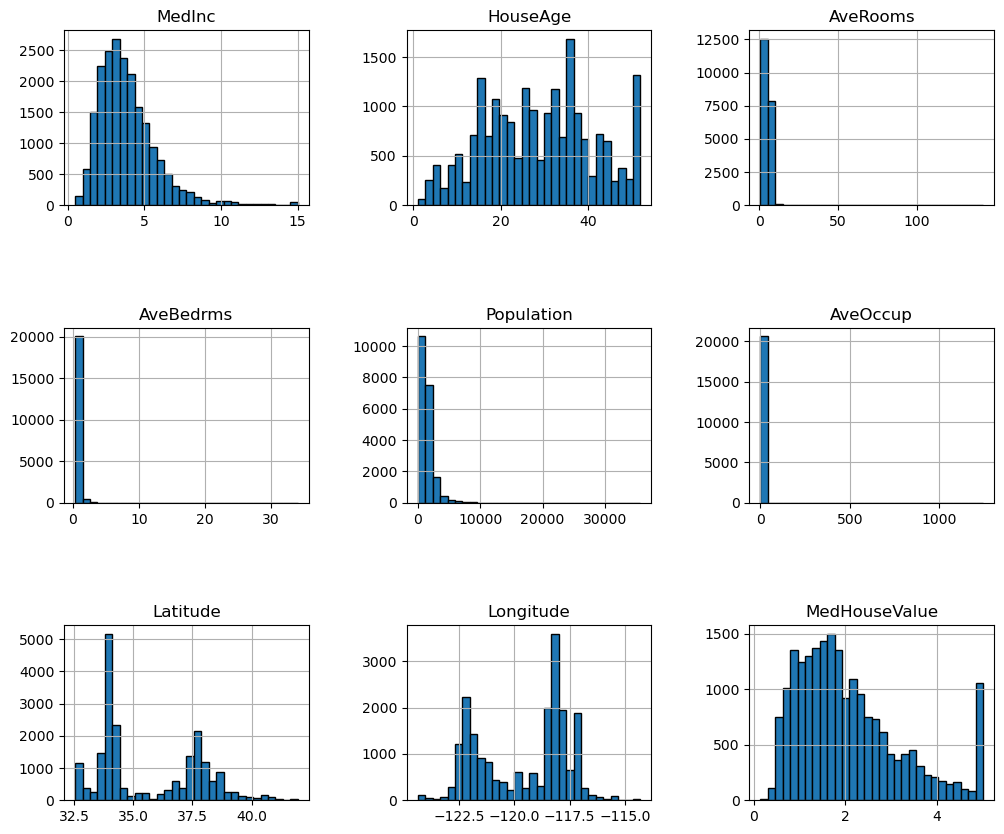

In [16]:
CaliforniaHousing_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

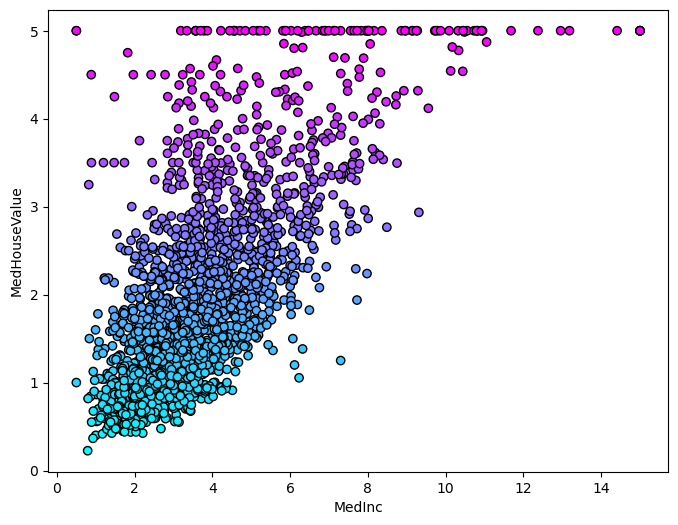

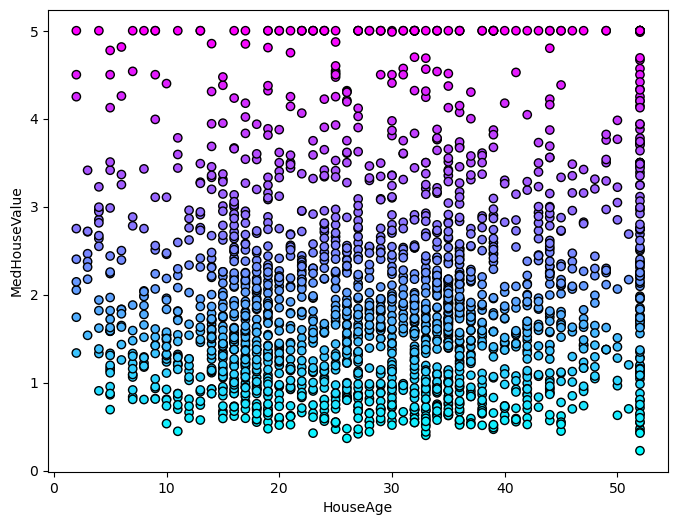

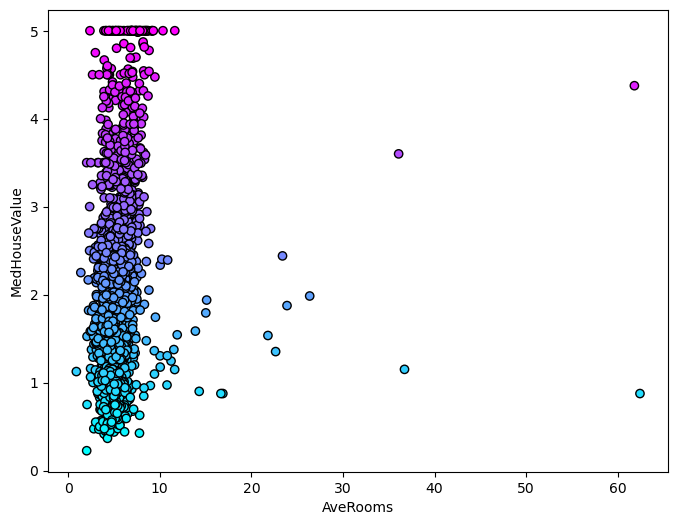

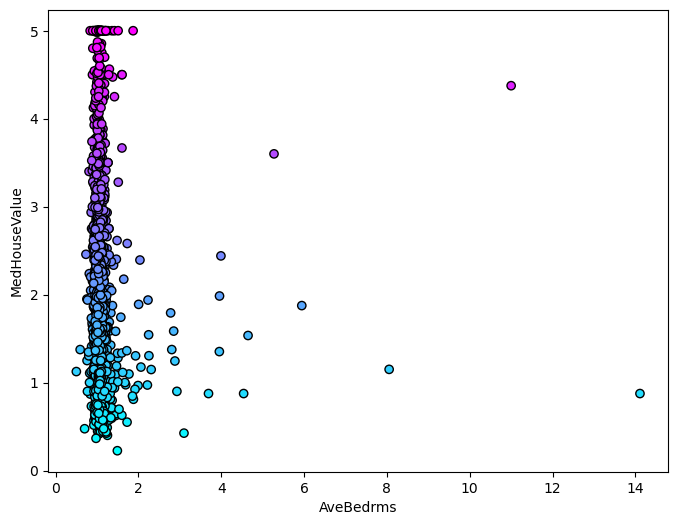

In [21]:
# Visualizing the features
features_of_interest = ["MedInc", "HouseAge", "AveRooms", "AveBedrms"]
sample_df = CaliforniaHousing_df.sample(frac=0.1, random_state=17)
for feature in features_of_interest:
    plt.figure(figsize=(8, 6))
    plt.scatter(sample_df[feature], sample_df['MedHouseValue'], c=sample_df['MedHouseValue'], cmap='cool', edgecolors='k')
    # Set x-axis label
    plt.xlabel(feature)

    # Set y-axis label
    plt.ylabel('MedHouseValue')

In [23]:
# Splitting the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(CaliforniaHousing.data, CaliforniaHousing.target, random_state=11)

print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


We use a portion of the available data, the training set, to train or fit the model and then use the remaining portion, the testing set, to evaluate how well the model can generalize to new, unseen data. Typically, the data is randomly split into a training set and a testing set, with a commonly used split being 80% for training and 20% for testing. The exact split may vary depending on the size of the dataset and the problem being solved.

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X=X_train, y=y_train)

# Save the trained model
joblib.dump(regr, 'regression-model.joblib')

['regression-model.joblib']

In [25]:
# Make predictions using the testing set
predicted = regr.predict(X_test)

Mean Squared Error (MSE) and R-squared (R2) are commonly used metrics for evaluating the performance of regression models in machine learning. 
Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values of the target variable.
R-squared (R2) measures the proportion of variance in the target variable that can be explained by the independent variables in the model. 
It is a value between 0 and 1, with a higher value indicating that the model is better at explaining the variance in the target variable.

In [26]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predicted))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, predicted))

Coefficients: 
 [ 4.37703022e-01  9.21683457e-03 -1.07325266e-01  6.11713307e-01
 -5.75682201e-06 -3.38456647e-03 -4.19481861e-01 -4.33771335e-01]
Mean squared error: 0.54
Coefficient of determination: 0.60


# Classification & Clustering

Classification and clustering are two important types of machine learning techniques, but they differ in their goals and methods.

Classification aims to predict the class or category of a given input based on labeled examples or historical data. The goal is to learn a mapping function that maps input features to a discrete output class label.
Clustering aims to group similar data points or observations together in an unsupervised manner, without any predefined class labels. The goal is to discover inherent structures or patterns in the data.

In [40]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In this example, we compare 3 classifiers in Scikit-learn
1. Nearest Neighbors
2. Linear SVM
3. Neural Net

In [41]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Neural Net",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    MLPClassifier(alpha=1, max_iter=1000),
]

dataset = make_circles(noise=0.2, factor=0.5, random_state=1)

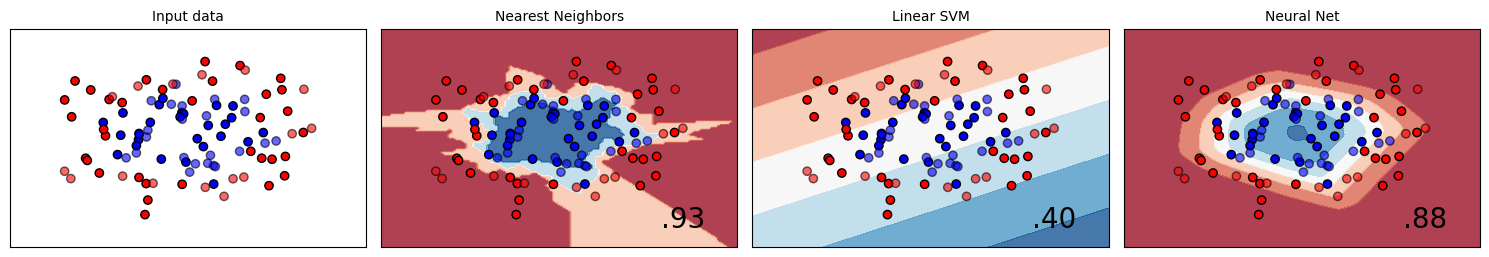

In [48]:
# preprocess dataset, split into training and test part
X, y = dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# just plot the dataset first
figure = plt.figure(figsize=(15, 5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(len(dataset), len(classifiers) + 1, 1)
ax.set_title("Input data", size=10)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
i = 2
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(dataset), len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name, size=10)
    ax.text(
        x_max - 0.3,
        y_min + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=20,
        horizontalalignment="right",
    )
    i += 1

plt.tight_layout()
plt.show()

Nearest Neighbor is a good choice for simple problems with low-dimensional data, while Linear SVM is a good choice for problems with high-dimensional data and linearly separable classes. Neural Networks are a good choice for complex problems with non-linear relationships between features and the target variable. It's important to consider the trade-offs between computational complexity, model interpretability, and accuracy when choosing an algorithm for a specific problem.

# Neural Networks

In [49]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

digits = datasets.load_digits()

In [50]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [51]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

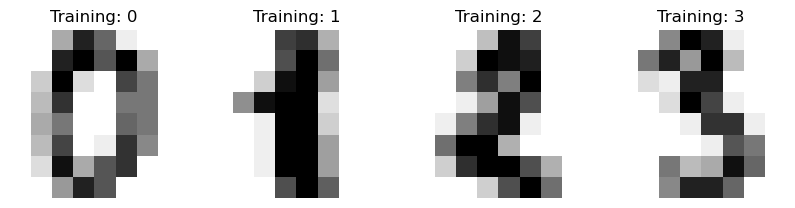

In [52]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [53]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

mlp.fit(X_train, y_train)

predicted = mlp.predict(X_test)

Iteration 1, loss = 2.25166741
Iteration 2, loss = 1.92625550
Iteration 3, loss = 1.64401782
Iteration 4, loss = 1.33795211
Iteration 5, loss = 1.06279849
Iteration 6, loss = 0.84214768
Iteration 7, loss = 0.67695986
Iteration 8, loss = 0.55457601
Iteration 9, loss = 0.45818499
Iteration 10, loss = 0.39062026
Iteration 11, loss = 0.33110794
Iteration 12, loss = 0.29293844
Iteration 13, loss = 0.26481023
Iteration 14, loss = 0.22485706
Iteration 15, loss = 0.20027397
Iteration 16, loss = 0.17860742
Iteration 17, loss = 0.16187474
Iteration 18, loss = 0.14945917
Iteration 19, loss = 0.14095293
Iteration 20, loss = 0.12928683
Iteration 21, loss = 0.12801227
Iteration 22, loss = 0.11151617
Iteration 23, loss = 0.10463400
Iteration 24, loss = 0.10072982
Iteration 25, loss = 0.09194901
Iteration 26, loss = 0.08858409
Iteration 27, loss = 0.08404859
Iteration 28, loss = 0.07931319
Iteration 29, loss = 0.07491209
Iteration 30, loss = 0.07252041
Iteration 31, loss = 0.07008570
Iteration 32, los

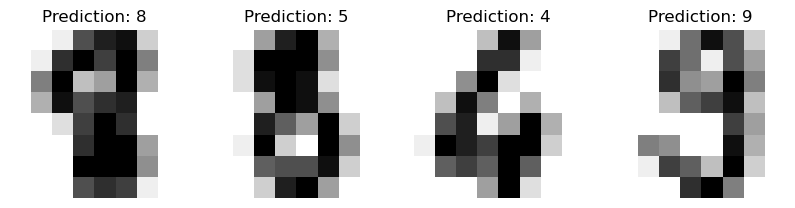

In [54]:
predicted = mlp.predict(X_test)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Accuracy: 0.9054505005561735


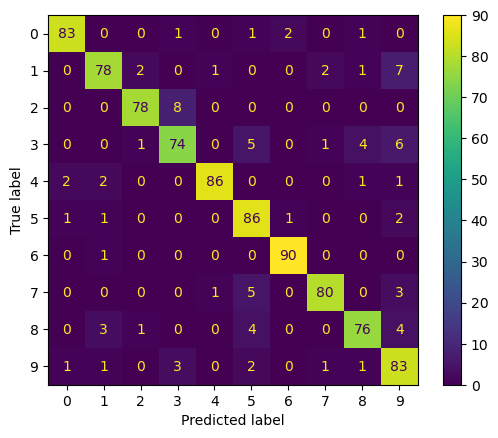

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print('Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.show()

The confusion matrix is a square matrix where the rows represent the actual classes and the columns represent the predicted classes. Each cell in the matrix represents the number of instances where the actual class and predicted class match.

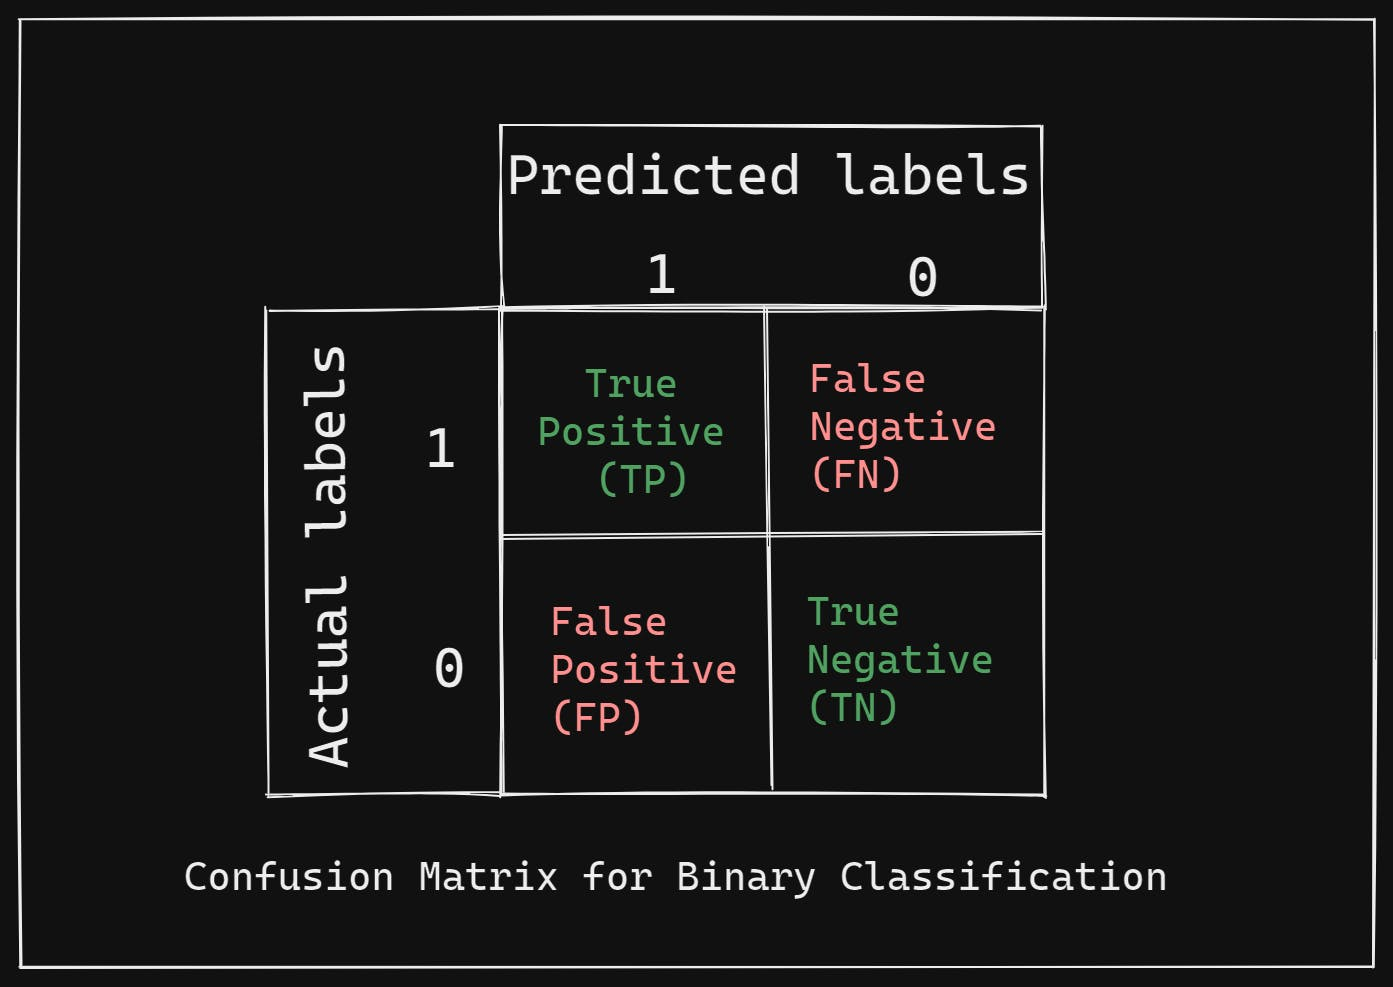

In [62]:
display.Image("https://hackernoon.imgix.net/images/BYWRsHWtmGOUC5N4fwNhMqohMAC3-c9c3gxs.png", width=600)